# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 14.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
259669,0.6250,0.0488,0.0024,0.0024,0.0024,0.0220,0.0854,0.2124,0.0024,0.0488,8,0,2,0
197265,0.2856,0.0415,0.0024,0.0024,0.0024,0.0024,0.0610,0.0952,0.0024,0.0024,5,0,12,0
81013,0.1196,0.0024,0.0024,0.0024,0.0024,0.0024,0.0049,0.1221,0.0024,0.0415,7,7,10,10
428850,0.0024,0.0781,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0024,0.0635,0,0,0,0
364782,0.3760,0.1245,0.1904,0.3198,0.1221,0.1807,0.3271,0.2100,0.1489,0.4150,0,0,0,0


In [3]:
raw_data.shape

(461607, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461607 entries, 0 to 461606
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          461607 non-null  float64
 1   Emg2          461607 non-null  float64
 2   Emg3          461607 non-null  float64
 3   Emg4          461607 non-null  float64
 4   Emg5          461607 non-null  float64
 5   Emg6          461607 non-null  float64
 6   Emg7          461607 non-null  float64
 7   Emg8          461607 non-null  float64
 8   Emg9          461607 non-null  float64
 9   Emg10         461607 non-null  float64
 10  repetition    461607 non-null  int64  
 11  rerepetition  461607 non-null  int64  
 12  stimulus      461607 non-null  int64  
 13  restimulus    461607 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.3 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000
mean,0.562477,0.171519,0.099438,0.062419,0.029975,0.052018,0.200229,0.255614,0.076876,0.212711,3.195770,2.497919,5.663920,4.565063
std,0.579902,0.276268,0.182943,0.130411,0.059618,0.106883,0.360185,0.212620,0.184109,0.308897,3.486784,3.364923,6.588134,6.471103
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.117200,0.002400,0.002400,0.002400,0.002400,0.002400,0.019500,0.144000,0.002400,0.017100,0.000000,0.000000,0.000000,0.000000
50%,0.368700,0.065900,0.017100,0.002400,0.002400,0.007300,0.075700,0.217300,0.002400,0.090300,2.000000,0.000000,3.000000,0.000000
75%,0.849600,0.229500,0.122100,0.061000,0.029300,0.063500,0.231900,0.280800,0.073200,0.285600,6.000000,5.000000,10.000000,9.000000
max,4.668000,3.747600,2.961400,2.023900,0.808100,2.138700,4.663100,3.269000,3.242200,4.602100,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     193393
2      15514
12     15509
8      15507
7      15504
4      15501
5      15476
9      15465
6      15462
11     15461
3      15452
1      15435
10     15432
17     10343
13     10342
14     10337
15     10300
16     10263
19      5171
21      5163
18      5161
20      5147
22      5138
23      5131
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

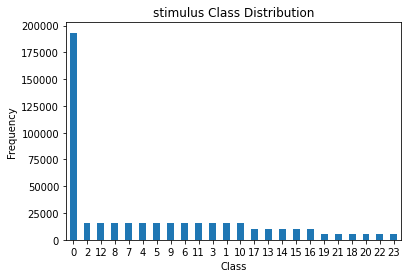

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
201680,0.4199,0.0391,0.0024,0.0024,0.0024,0.0024,0.0171,0.1538,0.0024,0.0024,0,0,0,0
268812,0.3809,0.0391,0.0024,0.0024,0.0024,0.0122,0.0562,0.0952,0.0024,0.0854,0,0,0,0
367266,0.2344,0.0024,0.0049,0.0024,0.0024,0.0024,0.0464,0.2295,0.0024,0.0098,0,0,0,0
177723,0.5786,0.1733,0.1294,0.0635,0.0317,0.0903,0.3516,0.2417,0.0415,0.1758,2,2,10,10
111136,0.3882,0.0024,0.0024,0.0024,0.0024,0.0024,0.0903,0.1538,0.0024,0.1245,0,0,0,0


In [12]:
raw_data.shape

(390414, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390414 entries, 0 to 461606
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          390414 non-null  float64
 1   Emg2          390414 non-null  float64
 2   Emg3          390414 non-null  float64
 3   Emg4          390414 non-null  float64
 4   Emg5          390414 non-null  float64
 5   Emg6          390414 non-null  float64
 6   Emg7          390414 non-null  float64
 7   Emg8          390414 non-null  float64
 8   Emg9          390414 non-null  float64
 9   Emg10         390414 non-null  float64
 10  repetition    390414 non-null  int64  
 11  rerepetition  390414 non-null  int64  
 12  stimulus      390414 non-null  int64  
 13  restimulus    390414 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 44.7 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(ccp_alpha= 0.0,
              class_weight= None,
              criterion = "entropy",
              max_depth = None,
              max_features = None,
              max_leaf_nodes = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              random_state = None,
              splitter = 'best')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 83.16150762650001


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     37515
           1       0.82      0.81      0.81      2235
           2       0.71      0.72      0.72      2340
           3       0.74      0.75      0.75      2154
           4       0.73      0.74      0.73      2186
           5       0.74      0.75      0.74      2062
           6       0.77      0.74      0.75      2329
           7       0.72      0.71      0.71      2264
           8       0.68      0.69      0.68      2354
           9       0.72      0.71      0.71      2352
          10       0.71      0.70      0.70      2117
          11       0.72      0.73      0.73      2378
          12       0.73      0.72      0.72      2567
          13       0.73      0.74      0.73      1473
          14       0.71      0.71      0.71      1438
          15       0.72      0.72      0.72      1529
          16       0.76      0.76      0.76      1614
 

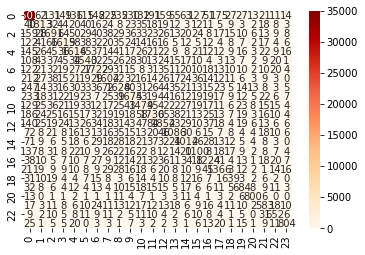

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.2306776122843641
MSE: 13.294814492271044
RMSE: 3.646205492326378


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8317197851938045
Recall Score :  0.8316150762650001
f1_score :  0.8316280579047065


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier(algorithm = 'ball_tree',
                                            leaf_size = 30,
                                            metric = 'minkowski',
                                            metric_params= None,
                                            n_jobs = -1,
                                            n_neighbors = 2,
                                            p = 1,
                                            weights = 'distance')
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=2, p=1,
                     weights='distance')

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 93.2149123368723


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     37515
           1       0.97      0.95      0.96      2235
           2       0.91      0.90      0.91      2340
           3       0.91      0.90      0.91      2154
           4       0.92      0.91      0.91      2186
           5       0.91      0.90      0.91      2062
           6       0.92      0.91      0.92      2329
           7       0.87      0.88      0.87      2264
           8       0.89      0.88      0.88      2354
           9       0.90      0.88      0.89      2352
          10       0.93      0.87      0.90      2117
          11       0.88      0.88      0.88      2378
          12       0.92      0.88      0.90      2567
          13       0.93      0.93      0.93      1473
          14       0.92      0.89      0.90      1438
          15       0.89      0.88      0.89      1529
          16       0.94      0.93      0.93      1614
 

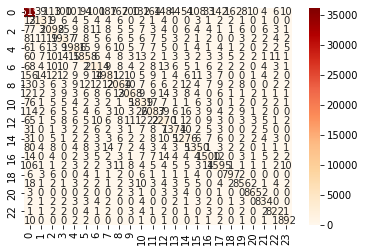

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.5403480911337936
MSE: 5.980482307288399
RMSE: 2.4455024651977757


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9319389139736798
Recall Score :  0.932149123368723
f1_score :  0.9319457095859577


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(
              bootstrap = True,
              ccp_alpha = 0.0,
              class_weight =  None,
              criterion = 'entropy',
              max_depth = None,
              max_features = 'auto' ,
              max_leaf_nodes = None,
              max_samples = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              n_estimators = 400,
              n_jobs = None,
              oob_score = False,
              random_state = None,
              verbose = 0,
              warm_start = False)
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 93.52868101891578


Classification report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     37515
           1       0.98      0.94      0.96      2235
           2       0.95      0.88      0.91      2340
           3       0.96      0.87      0.91      2154
           4       0.96      0.89      0.92      2186
           5       0.96      0.88      0.92      2062
           6       0.96      0.89      0.92      2329
           7       0.95      0.83      0.89      2264
           8       0.95      0.83      0.89      2354
           9       0.95      0.85      0.90      2352
          10       0.96      0.85      0.90      2117
          11       0.94      0.86      0.90      2378
          12       0.95      0.87      0.91      2567
          13       0.94      0.91      0.92      1473
          14       0.95      0.87      0.91      1438
          15       0.94      0.85      0.89      1529
          16       0.94      0.90      0.92      1614
 

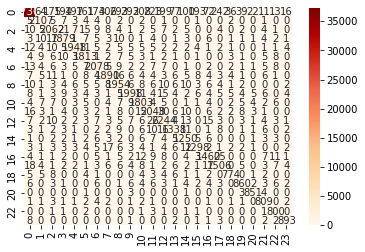

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.5310759064072845
MSE: 6.051432450085166
RMSE: 2.45996594490354


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.936631747542855
Recall Score :  0.9352868101891577
f1_score :  0.9343024880676917


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(base_score = None,
              booster = 'gbtree',
              colsample_bylevel = None,
              colsample_bynode = None,
              colsample_bytree = None,
              enable_categorical = False,
              gamma = 0,
              gpu_id = None,
              importance_typen = None,
              interaction_constraints = None,
              learning_rate = 0.5,
              max_delta_step = None,
              max_depth = 50,
              min_child_weight = 1,
              monotone_constraints = None,
              n_estimators = 400,
              n_jobs = None,
              num_parallel_tree = None,
              objective = 'multi:softmax',
              predictor = 'gpu_predictor',
              random_state = None,
              reg_alpha = None,
              reg_lambda = None,
              scale_pos_weight = None,
              subsample = None,
              tree_method = None,
              use_label_encoder = True,
              validate_parameters = None,
              verbosity = None)
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIn

[21:11:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None, importance_typen=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=50, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob',
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 92.97286221072449


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     37515
           1       0.96      0.94      0.95      2235
           2       0.92      0.87      0.89      2340
           3       0.92      0.87      0.90      2154
           4       0.92      0.89      0.91      2186
           5       0.91      0.88      0.90      2062
           6       0.93      0.89      0.91      2329
           7       0.91      0.85      0.88      2264
           8       0.90      0.83      0.87      2354
           9       0.91      0.86      0.88      2352
          10       0.90      0.85      0.88      2117
          11       0.92      0.85      0.88      2378
          12       0.91      0.86      0.89      2567
          13       0.91      0.90      0.91      1473
          14       0.91      0.86      0.88      1438
          15       0.90      0.86      0.88      1529
          16       0.92      0.89      0.91      1614
 

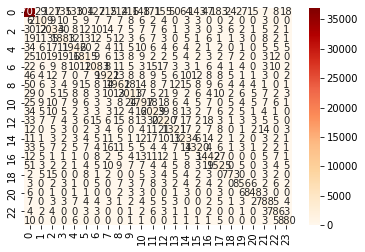

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.5403480911337936
MSE: 6.026126045361987
RMSE: 2.454816906688152


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.9291258720780362
Recall Score :  0.9297286221072448
f1_score :  0.9288550514691036


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier(bootstrap = False,
             ccp_alpha = 0.0,
             class_weight = None,
             criterion = 'entropy',
             max_depth = None,
             max_features = 'auto',
             max_leaf_nodes = None,
             max_samples = None,
             min_impurity_decrease = 0.0,
             min_samples_leaf = 1,
             min_samples_split = 2,
             min_weight_fraction_leaf = 0.0,
             n_estimators = 400,
             n_jobs = None,
             oob_score = False,
             random_state = None,
             verbose = 0,
             warm_start = False)
extratree.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', n_estimators=400)

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 93.93722064982134


Classification report : 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     37515
           1       0.99      0.96      0.97      2235
           2       0.97      0.89      0.93      2340
           3       0.97      0.88      0.93      2154
           4       0.97      0.90      0.93      2186
           5       0.97      0.89      0.93      2062
           6       0.97      0.90      0.93      2329
           7       0.96      0.83      0.89      2264
           8       0.96      0.84      0.89      2354
           9       0.96      0.85      0.90      2352
          10       0.96      0.86      0.91      2117
          11       0.96      0.86      0.91      2378
          12       0.96      0.88      0.92      2567
          13       0.96      0.92      0.94      1473
          14       0.96      0.88      0.92      1438
          15       0.94      0.85      0.89      1529
          16       0.96      0.92      0.94      1614
 

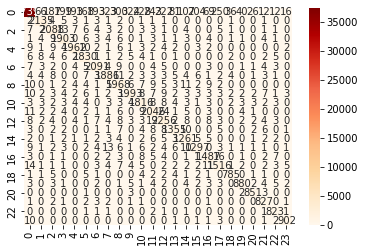

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.5142860801967137
MSE: 5.907956917638923
RMSE: 2.430628914013598


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9415401454350363
Recall Score :  0.9393722064982134
f1_score :  0.9385387424826646
